In [9]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from datetime import datetime
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import re

import torch
from torch import nn
import torch.nn.functional as F
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter


from sklearn.model_selection import train_test_split



from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

import numpy as np




In [12]:
review_train = []
with open("./dataset/review_train.json", "r") as file:
    for line in file:
        review_train.append(json.loads(line))

review_test = []
with open("./dataset/review_test.json", "r") as file:
    for line in file:
        review_test.append(json.loads(line))
        

In [3]:
def tokenize(text):
    return text.split()

In [4]:
train_texts = [review['text'] for review in review_train]
test_texts = [review['text'] for review in review_test]

train_lengths = [len(tokenize(text)) for text in train_texts]
test_lengths = [len(tokenize(text)) for text in test_texts]


In [5]:
# 1: Text Length
max_train_length = max(train_lengths)
avg_train_length = np.mean(train_lengths)
max_test_length = max(test_lengths)
avg_test_length = np.mean(test_lengths)

print(f"Train Set - Max Review Length: {max_train_length}, Avg Review Length: {avg_train_length:.2f}")
print(f"Test Set - Max Review Length: {max_test_length}, Avg Review Length: {avg_test_length:.2f}")


Train Set - Max Review Length: 1006, Avg Review Length: 130.54
Test Set - Max Review Length: 978, Avg Review Length: 130.87


In [55]:
# 2: Vocabulary Distribution (Top 20 Words)

all_texts = train_texts + test_texts
all_tokens = [token for text in all_texts for token in tokenize(text)]
vocab_counter = Counter(all_tokens)
most_common_vocab = vocab_counter.most_common(40)

print("Top 20 Most Common Words:")
for word, count in most_common_vocab:
    print(f"{word}: {count}")

Top 20 Most Common Words:
the: 1261668
and: 965741
I: 793520
a: 793425
to: 682788
of: 469372
was: 456758
is: 385486
for: 328365
in: 314745
it: 271445
The: 263765
that: 249671
with: 240871
but: 215401
my: 207851
you: 199794
have: 198539
on: 198197
this: 175578
are: 155866
had: 155221
they: 154627
not: 146741
at: 143687
were: 136413
we: 125557
so: 121731
be: 120750
as: 116210
place: 115770
like: 105815
just: 94558
food: 93205
good: 90616
very: 88215
out: 84224
or: 84095
get: 83656
all: 80736


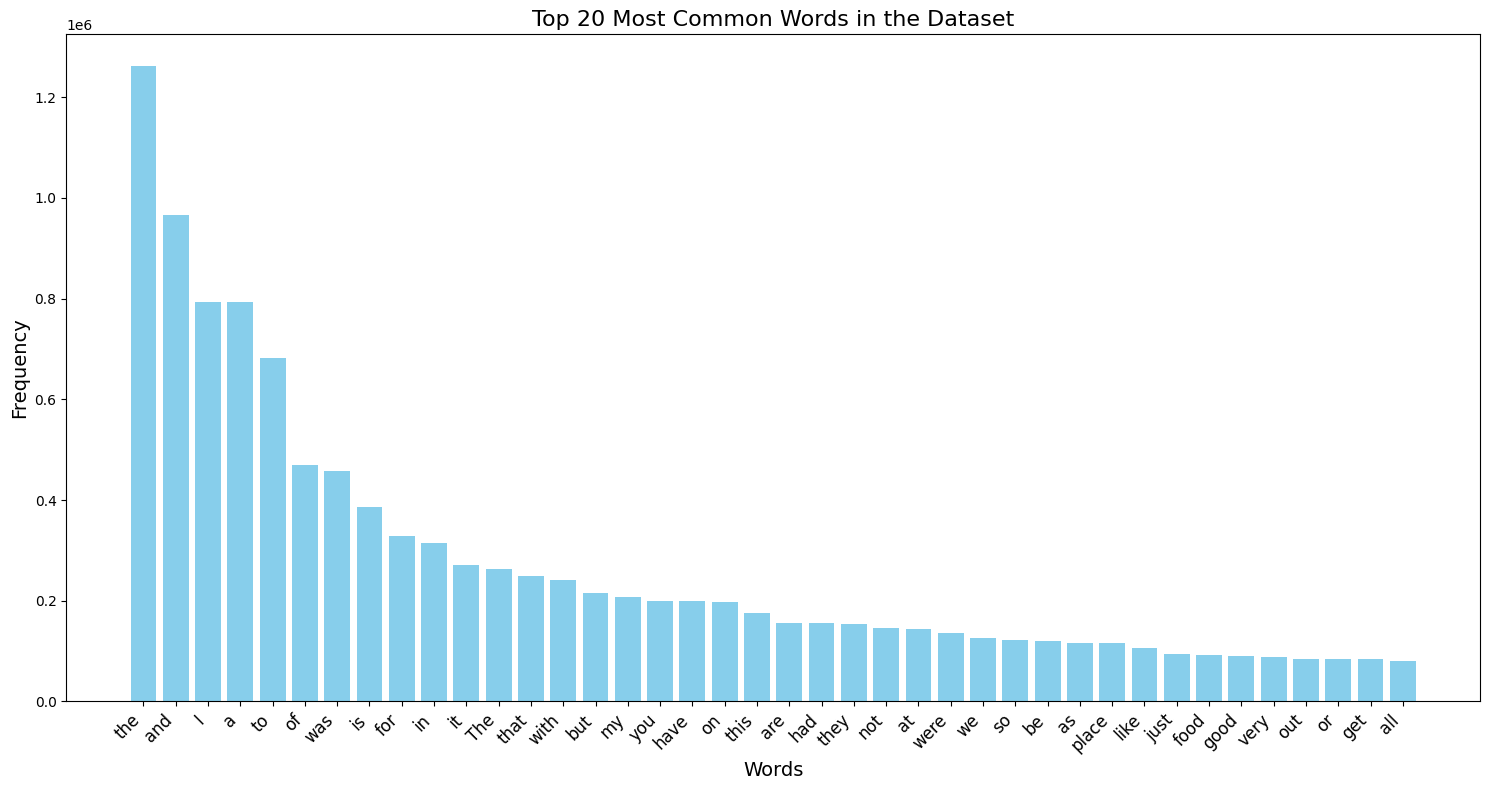

In [56]:
words, counts = zip(*most_common_vocab)

# Plot the distribution
plt.figure(figsize=(15, 8))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Most Common Words in the Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_review_text(review_text):
    review_text = review_text.lower()
    review_text = re.sub(r'\W+', ' ', review_text)
    words = [word for word in review_text.split() if word not in stop_words]
    processed_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return processed_words


review_text_train = [
    preprocess_review_text(review['text']) for review in review_train
]

review_text_test = [
    preprocess_review_text(review['text']) for review in review_test
]



In [ ]:
max_length_processed_train = max(len(tokens) for tokens in review_text_train)
avg_length_processed_train = np.mean([len(tokens) for tokens in review_text_train])
max_length_processed_test = max(len(tokens) for tokens in review_text_test)
avg_length_processed_test = np.mean([len(tokens) for tokens in review_text_test])

print(f"Train Set - Max Review Length: {max_length_processed_train}, Avg Review Length: {avg_length_processed_train:.2f}")
print(f"Test Set - Max Review Length: {max_length_processed_test}, Avg Review Length: {avg_length_processed_test:.2f}")


Train Set - Max Review Length: 555, Avg Review Length: 66.24
Test Set - Max Review Length: 509, Avg Review Length: 66.36


In [25]:
# amount reduced 
total_word_processed = sum(len(tokens) for tokens in review_text_train) + sum(len(tokens) for tokens in review_text_test)
total_word = sum(train_lengths) + sum(test_lengths)
percentage = total_word_processed/total_word
print(f"the percent of processed word {percentage}")

the percent of processed word 0.5073628074763673


In [52]:
# top word of the processed word
all_processed = review_text_train + review_text_test
all_tokens_p = [token for text in all_processed for token in text]


# Tokenize all texts and count vocabulary
vocab_counter_p = Counter(all_tokens_p)
most_common_vocab = vocab_counter_p.most_common(60)

# # Display the top 20 most common words
print("Top 20 Most Common Words:")
for word, count in most_common_vocab:
    print(f"{word}: {count}")

Top 20 Most Common Words:
place: 171504
go: 162441
get: 155214
good: 154288
food: 141688
like: 127950
great: 116068
time: 106302
one: 95236
order: 86201
make: 82296
come: 78843
really: 78153
service: 75983
would: 72119
try: 70632
back: 70558
love: 67763
say: 61974
take: 58419
also: 56855
think: 54863
even: 54143
eat: 53201
look: 52064
nice: 50964
little: 50120
well: 49504
know: 49141
want: 48796
price: 47230
drink: 45893
always: 45711
find: 45597
best: 45143
give: 44647
us: 43187
much: 41115
wait: 41103
chicken: 40650
restaurant: 40325
people: 40301
pretty: 40227
menu: 40169
bar: 40141
first: 37967
see: 37420
could: 37152
friendly: 35245
never: 35235
taste: 34901
fry: 34788
table: 33633
staff: 33628
better: 33619
way: 33488
bite: 33049
lunch: 32522
star: 32043
pizza: 31954


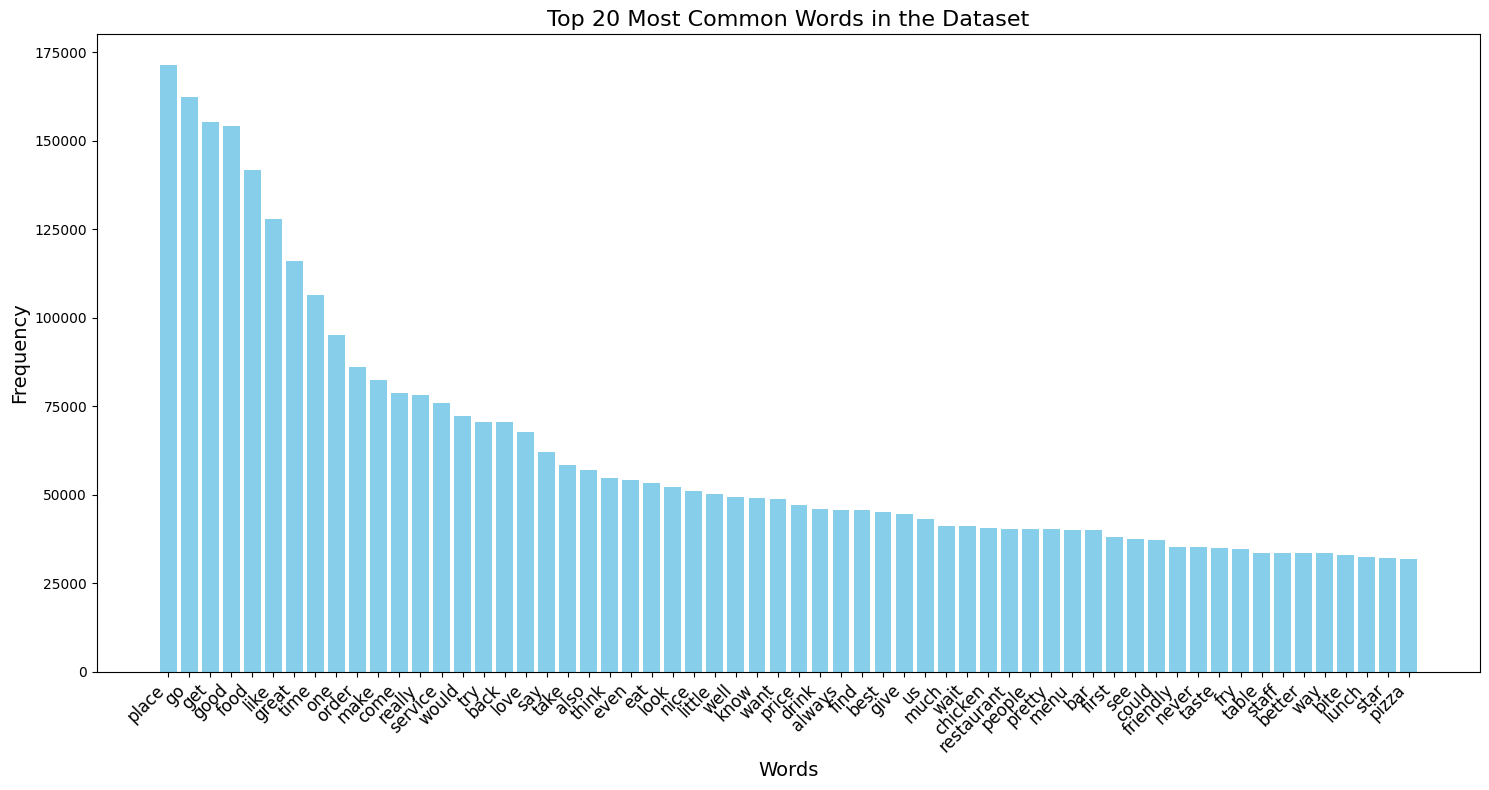

In [53]:
words, counts = zip(*most_common_vocab)

# Plot the distribution
plt.figure(figsize=(15, 8))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Most Common Words in the Dataset', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
print(f"vocab size before processing {len(all_tokens)} and size after processing {len(all_tokens_p)}")

vocab size before processing 30026454 and size after processing 15234306
